<a href="https://colab.research.google.com/github/RajkumarShenigaram/TrafficPrediction/blob/main/TrafficPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving traffic.csv to traffic (1).csv


In [ ]:

import numpy as np
import pandas as pd
traffic_data = pd.read_csv("traffic.csv")

In [ ]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
traffic_data.dtypes

,0
DateTime,object
Junction,int64
Vehicles,int64
ID,int64


In [ ]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

In [ ]:
traffic_data['Junction'].value_counts()

,count
Junction,
1,14592
2,14592
3,14592
4,4344


In [ ]:
traffic_data['year'] = traffic_data['DateTime'].dt.year

In [ ]:
# Extract the month name
traffic_data['monthname'] = traffic_data['DateTime'].dt.month_name()

# Extract the week number
traffic_data['weeknumber'] = traffic_data['DateTime'].dt.isocalendar().week

# Extract the day name
traffic_data['dayname'] = traffic_data['DateTime'].dt.day_name()

# Extract the hour, minute, and second
traffic_data['hour'] = traffic_data['DateTime'].dt.hour
traffic_data['minute'] = traffic_data['DateTime'].dt.minute
traffic_data['second'] = traffic_data['DateTime'].dt.second


In [ ]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID,year,monthname,weeknumber,dayname,hour,minute,second
0,2015-11-01 00:00:00,1,15,20151101001,2015,November,44,Sunday,0,0,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,November,44,Sunday,1,0,0
2,2015-11-01 02:00:00,1,10,20151101021,2015,November,44,Sunday,2,0,0
3,2015-11-01 03:00:00,1,7,20151101031,2015,November,44,Sunday,3,0,0
4,2015-11-01 04:00:00,1,9,20151101041,2015,November,44,Sunday,4,0,0


In [ ]:
traffic_data = pd.get_dummies(traffic_data, ['monthname','dayname'], drop_first = True)

In [ ]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID,year,weeknumber,hour,minute,second,monthname_August,...,monthname_May,monthname_November,monthname_October,monthname_September,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,2015-11-01 00:00:00,1,15,20151101001,2015,44,0,0,0,False,...,False,True,False,False,False,False,True,False,False,False
1,2015-11-01 01:00:00,1,13,20151101011,2015,44,1,0,0,False,...,False,True,False,False,False,False,True,False,False,False
2,2015-11-01 02:00:00,1,10,20151101021,2015,44,2,0,0,False,...,False,True,False,False,False,False,True,False,False,False
3,2015-11-01 03:00:00,1,7,20151101031,2015,44,3,0,0,False,...,False,True,False,False,False,False,True,False,False,False
4,2015-11-01 04:00:00,1,9,20151101041,2015,44,4,0,0,False,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
traffic_data['minute'].value_counts()

,count
minute,
0,48120


In [ ]:
traffic_data = traffic_data.drop(['DateTime','ID','minute','second'], axis = 1)


In [ ]:
traffic_data.head()

,Junction,Vehicles,year,weeknumber,hour,monthname_August,monthname_December,monthname_February,monthname_January,monthname_July,...,monthname_May,monthname_November,monthname_October,monthname_September,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,1,15,2015,44,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,1,13,2015,44,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,1,10,2015,44,2,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,1,7,2015,44,3,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,1,9,2015,44,4,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
corr= traffic_data[['Junction','Vehicles','year','weeknumber','hour','monthname_August','monthname_December','monthname_February','monthname_May','monthname_November','monthname_October','monthname_September','dayname_Monday','dayname_Saturday','dayname_Sunday','dayname_Thursday','dayname_Tuesday','dayname_Wednesday']].corr()
corr

,Junction,Vehicles,year,weeknumber,hour,monthname_August,monthname_December,monthname_February,monthname_May,monthname_November,monthname_October,monthname_September,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
Junction,1.000000e+00,-0.613787,2.212977e-01,-1.231554e-01,-2.132575e-15,-4.118033e-02,-5.970798e-02,3.462405e-02,3.788944e-02,-5.864042e-02,-4.118033e-02,-4.047894e-02,2.688514e-04,-1.622581e-03,2.688514e-04,2.688514e-04,2.688514e-04,2.688514e-04
Vehicles,-6.137872e-01,1.000000,2.212531e-01,-3.374743e-02,2.199377e-01,-9.087104e-03,-5.898331e-02,2.735215e-03,3.092771e-02,-4.929668e-02,3.996139e-02,2.981336e-02,3.187225e-02,-8.296896e-02,-1.114219e-01,4.651680e-02,4.915345e-02,4.645389e-02
year,2.212977e-01,0.221253,1.000000e+00,-6.201417e-01,7.732006e-16,-9.659137e-02,-3.995676e-01,1.578615e-01,1.705453e-01,-3.924235e-01,-9.659137e-02,-9.494621e-02,-1.016856e-03,-8.384401e-04,-1.016856e-03,-1.016856e-03,-1.016856e-03,-1.016856e-03
weeknumber,-1.231554e-01,-0.033747,-6.201417e-01,1.000000e+00,4.584712e-16,1.234809e-01,5.403146e-01,-3.641579e-01,-9.461519e-02,4.437380e-01,2.452378e-01,1.810266e-01,-9.289174e-04,-1.684743e-03,6.319495e-03,-9.289174e-04,-9.289174e-04,-9.289174e-04
hour,-2.132575e-15,0.219938,7.732006e-16,4.584712e-16,1.000000e+00,5.917523e-16,-1.816781e-16,-4.549219e-16,4.687958e-17,-7.113127e-17,2.633468e-16,3.528761e-16,-6.422117e-18,1.102804e-17,-1.004431e-17,6.547743e-18,-6.778056e-18,-1.144142e-17
monthname_August,-4.118033e-02,-0.009087,-9.659137e-02,1.234809e-01,5.917523e-16,1.000000e+00,-7.052412e-02,-7.320912e-02,-7.683227e-02,-6.926317e-02,-4.864017e-02,-4.781172e-02,1.142858e-02,-7.673986e-03,-8.885521e-03,-8.885521e-03,1.142858e-02,1.142858e-02
monthname_December,-5.970798e-02,-0.058983,-3.995676e-01,5.403146e-01,-1.816781e-16,-7.052412e-02,1.000000e+00,-1.061470e-01,-1.114003e-01,-1.004257e-01,-7.052412e-02,-6.932294e-02,-1.288325e-02,3.686712e-03,-1.288325e-02,1.657048e-02,1.843612e-03,1.843612e-03
monthname_February,3.462405e-02,0.002735,1.578615e-01,-3.641579e-01,-4.549219e-16,-7.320912e-02,-1.061470e-01,1.000000e+00,-1.156415e-01,-1.042491e-01,-7.320912e-02,-7.196222e-02,1.197746e-02,-4.229393e-04,-2.311399e-03,-2.311399e-03,-2.311399e-03,-2.311399e-03
monthname_May,3.788944e-02,0.030928,1.705453e-01,-9.461519e-02,4.687958e-17,-7.683227e-02,-1.114003e-01,-1.156415e-01,1.000000e+00,-1.094085e-01,-7.683227e-02,-7.552365e-02,1.805265e-02,-1.212187e-02,-2.835016e-04,-1.403562e-02,1.805265e-02,4.300537e-03
monthname_November,-5.864042e-02,-0.049297,-3.924235e-01,4.437380e-01,-7.113127e-17,-6.926317e-02,-1.004257e-01,-1.042491e-01,-1.094085e-01,1.000000e+00,-6.926317e-02,-6.808347e-02,6.149715e-03,-7.048093e-03,6.149715e-03,-8.795956e-03,6.149715e-03,6.149715e-03


<Axes: >

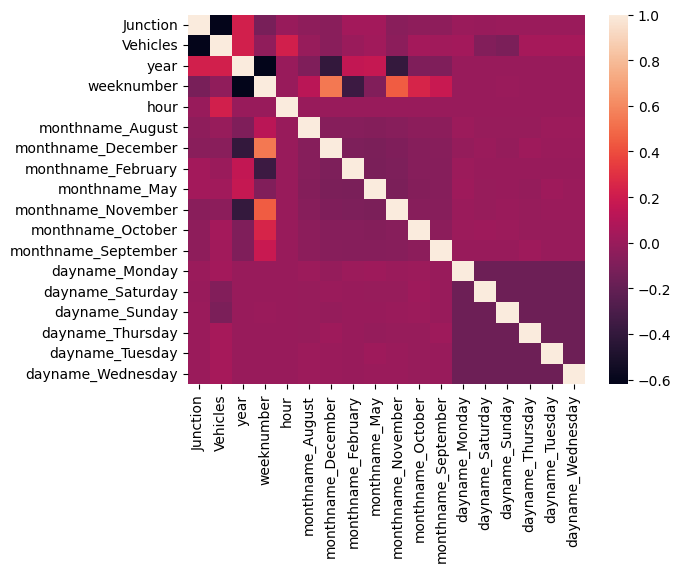

In [ ]:
import seaborn as sns
sns.heatmap(corr)


In [ ]:
traffic_data.head()

,Junction,Vehicles,year,weeknumber,hour,monthname_August,monthname_December,monthname_February,monthname_January,monthname_July,...,monthname_May,monthname_November,monthname_October,monthname_September,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,1,15,2015,44,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,1,13,2015,44,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,1,10,2015,44,2,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,1,7,2015,44,3,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,1,9,2015,44,4,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
target = traffic_data['Vehicles']
features = traffic_data.drop(['Vehicles'], axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [ ]:
X_test

,Junction,year,weeknumber,hour,monthname_August,monthname_December,monthname_February,monthname_January,monthname_July,monthname_June,...,monthname_May,monthname_November,monthname_October,monthname_September,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
24632,2,2016,51,8,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36428,3,2016,34,20,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
42150,3,2017,17,6,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
23885,2,2016,47,5,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2174,1,2016,4,14,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,1,2016,19,2,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
19482,2,2016,20,18,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
24710,2,2016,52,14,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7438,1,2016,36,22,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
print(X_train.isnull().sum())


Junction               0
year                   0
weeknumber             0
hour                   0
monthname_August       0
monthname_December     0
monthname_February     0
monthname_January      0
monthname_July         0
monthname_June         0
monthname_March        0
monthname_May          0
monthname_November     0
monthname_October      0
monthname_September    0
dayname_Monday         0
dayname_Saturday       0
dayname_Sunday         0
dayname_Thursday       0
dayname_Tuesday        0
dayname_Wednesday      0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

clf = LinearRegression()
clf.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf_score=clf.score(X_test, y_test)
print(clf_score)

0.60863938053125


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 9.60
Mean Squared Error (MSE): 161.98
Root Mean Squared Error (RMSE): 12.73
R-squared (R²): 0.61


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

clf = LinearRegression()
clf.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred_scaled = clf.predict(X_test_scaled)

In [ ]:
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Mean Squared Error (MSE): {mse_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R²): {r2_scaled:.2f}")

Mean Absolute Error (MAE): 9.60
Mean Squared Error (MSE): 161.98
Root Mean Squared Error (RMSE): 12.73
R-squared (R²): 0.61
